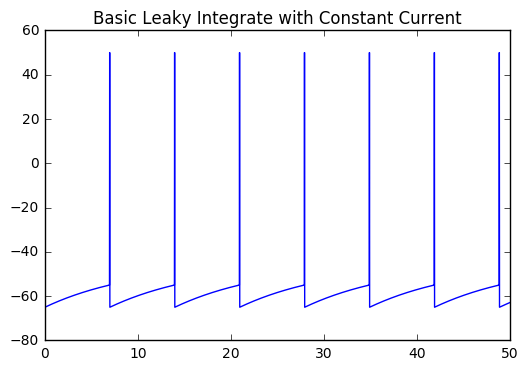

In [70]:
import math
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal

time = 50
dt = 0.02
size = time * int(1/dt)

R_M = 0.5
C_M = 1000
tau = R_M * C_M
E_L = -55.0
rest_potential = -65.0
time_space = np.linspace(0, time, size)

u_diff = lambda u, I, g_con : (E_L + R_M*I - g_con*(u+80) - u)/tau
#u_adapt = lambda u, I, g_con : (E_L + R_M*I - g_con*(u+80) - u)/tau
g_diff = lambda g, tau_rsa : -(float(g)/tau_rsa)

def leaky_integrate(time_vector, Input_current, refrac_period = 0, spike_adaptation = False):
    time_size = len(time_vector)
    potential = np.full(time_size, rest_potential)
    count = 0
    g_con = 0
        
    i = 1
    while (i < size):
        previous = potential[i-1]
        
        if previous > -55 and previous < 0:
            count += 1
            potential[i] = 50           
            if spike_adaptation == True:
                g_con = 0.3
            g_con += g_diff(g_con, 50)
            i += 1
        elif previous == 50:
            potential[i] = rest_potential
            i += 1 + refrac_period
        else:   
            potential[i] = u_diff(previous, Input_current[i], g_con) + previous
            i += 1 
    return potential, count


Input_current = np.full(size, 20)
result, count = leaky_integrate(time_space, Input_current)
plt.subplot(111)
plt.title('Basic Leaky Integrate with Constant Current')
plt.plot(time_space, result)
plt.show()

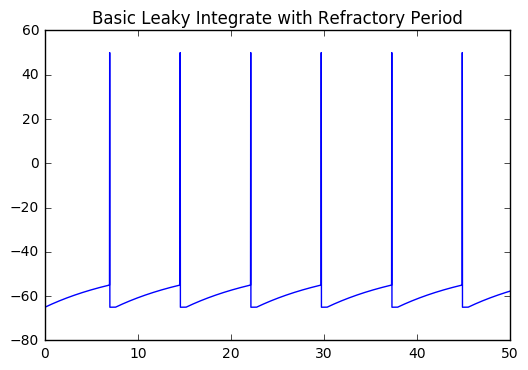

In [62]:
Input_current1 = np.full(size, 20)
result, count = leaky_integrate(time_space, Input_current1, 30)
plt.subplot(111)
plt.title('Basic Leaky Integrate with Refractory Period')
plt.plot(time_space, result)
plt.show()

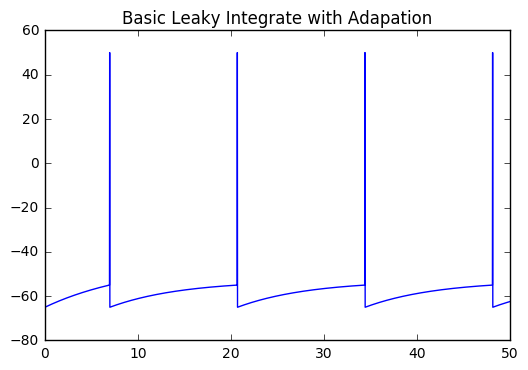

In [72]:
Input_current1 = np.full(size, 20)
result, count = leaky_integrate(time_space, Input_current1, 0, True)
plt.subplot(111)
plt.title('Basic Leaky Integrate with Adapation')
plt.plot(time_space, result)
plt.show()